### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.  

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv 
DATA_FILE = '/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/projects/required/project-eda-options/data/chipotle.tsv'

with open(DATA_FILE,'r') as tsv:
    handle = csv.reader(tsv) 
    list_A = [x for x in handle]

In [2]:
len(list_A) #number of rows in the dataset (including the header)

4623

## A view of what the raw order data looks like after being read into a list: 
### Each row is a list of strings each containing "\t" character's

#### this row contains the 'NULL' string in the choice_description column

In [3]:
list_A[35]

['17\t1\tBottled Water\tNULL\t$1.09']

#### this row contains a simple list in the choice_description column

In [4]:
list_A[62] #this row contains a simple list in the choice_description column

['28\t1\tSteak Soft Tacos\t[Fresh Tomato Salsa', ' Cheese]\t$9.25']

#### this row contains a nested list in the choice_description column

In [5]:
list_A[34]

['17\t1\tCarnitas Bowl\t[Tomatillo-Red Chili Salsa (Hot)',
 ' [Black Beans',
 ' Rice',
 ' Fajita Veggies',
 ' Cheese',
 ' Sour Cream',
 ' Lettuce]]\t$8.99']

### this variation in the choice_description makes for some work to be done!

# Unpacking these messy strings into a clean list of order attributes







##### Our goal is to convert this list of strings:
#### >>['2\t2\tChicken Bowl\t[Tomatillo-Red Chili Salsa (Hot)',' [Black Beans',' Rice',' Cheese',' Sour Cream]]\t$16.98']

##### into a clean list of order attributes:
####    >> ['2',  '2',  'Chicken Bowl',  ['Tomatillo-Red Chili Salsa (Hot)',  ['Black Beans', 'Rice', 'Cheese',  'Sour Cream']],  '$16.98']

In [6]:
list_of_rows = []
for order in list_A:
    if len(order) == 1:
        list_of_rows.append(order[0].split("\t"))
    else:
        empty = []
        for x in order:
            for y in x.split("\t"):
                empty.append(y)
        
        final = []
        for x in empty[:3]:
            final.append(x)    
        if ','.join(empty[3:len(empty)-1]).count("[") == 1: 
            final.append([','.join(empty[3:len(empty)-1]).split(",")[0][1:],
             ','.join(empty[3:len(empty)-1]).split(",")[1][:len(','.join(empty[3:len(empty)-1]).split(",")[1])-1].lstrip()])
        elif ','.join(empty[3:len(empty)-1]).count("[") == 2:
            final.append([','.join(empty[3:len(empty)-1]).split(" [")[0][1:len(','.join(empty[3:len(empty)-1]).split(" [")[0])-1],
             ','.join(empty[3:len(empty)-1]).split(" [")[1][:len(','.join(empty[3:len(empty)-1]).split(" [")[1])-2].split(", ")])
        elif ','.join(empty[3:len(empty)-1]).count("[") == 3:
            final.append([items for items in 
             ','.join(empty[3:len(empty)-1]).split("[ ")[0][2:','.join(empty[3:len(empty)-1]).split("[ ")[0].find("]")].split(", ")]+
            [items for items in ','.join(empty[3:len(empty)-1]).split("[ ")[0][','.join(empty[3:len(empty)-1]).split("[ ")[0].find("]")+4:len(','.join(empty[3:len(empty)-1]).split("[ ")[0])-2].split(", ")]) 
        final.append(empty[len(empty)-1]) 
        list_of_rows.append(final) 

In [7]:
header = list_of_rows[0] #extract the header
header

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [8]:
list_of_rows[1][4]

'$2.39'

In [9]:
type(list_of_rows[1][4])

str

In [10]:
choice_description =[]
for i in range(1,len(list_of_rows)):
    if type(list_of_rows[i][3]) == list or list_of_rows[i][3] == "NULL":
        choice_description.append(list_of_rows[i][3])
    else:
        empty = []
        empty.append(list_of_rows[i][3][1:len(list_of_rows[i][3])-1])
        choice_description.append(empty)

# Now let's make a dictionary and convert it into a pandas dataframe

In [11]:
import pandas as pd
chipotle_data = {header[0]:[int(list_of_rows[i][0]) for i in range(1,len(list_of_rows))],
                 header[1]:[int(list_of_rows[i][1]) for i in range(1,len(list_of_rows))],
                 header[2]:[list_of_rows[i][2] for i in range(1,len(list_of_rows))],
                 header[3]:choice_description,
                 header[4]:[float(list_of_rows[i][4][1:]) for i in range(1,len(list_of_rows))]
                }

#### the nice method below allows us to convert a dictionary into a pandas dataframe



In [12]:
chipotle = pd.DataFrame.from_dict(chipotle_data) 

In [13]:
chipotle.head(15)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NULL,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## Counting the number of unique orders

In [15]:
print("There are", len(chipotle), "rows in the chipotle dataset.") #at first seems to imply there are 4622 orders

There are 4622 rows in the chipotle dataset.


## Notice that multiple rows share the same `"order ID"`, meaning that multiple rows correspond to the same order.

In [16]:
chipotle[["order_id","quantity","item_name","item_price"]].head(7) 

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98
5,3,1,Chicken Bowl,10.98
6,3,1,Side of Chips,1.69


### Hence counting the number of rows does not give us an indicator of the number of unique orders

### To account for this, we apply the pandas `.groupby()` method , grouping the `chipotle` dataframe by the `"order_id"` column

In [17]:
print("There are", len(chipotle.groupby("order_id")), "unique orders in the chipotle dataset.")
#if we group the orders by order_id this tells us there are 1834 unique orders in the set

There are 1834 unique orders in the chipotle dataset.


## Computing the average order price

In [18]:
print("The true average order price is", "$"+format(sum(chipotle["item_price"])/len(chipotle.groupby("order_id")), ".2f")+".")

The true average order price is $18.81.


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

## SUBSETTING THE DATA

In [19]:
set(chipotle["item_name"]) #all items on offer at Chipotle

{'6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [20]:
#the drink_finder function returns True if a row corresponds to a drink order and false otherwise
def drink_finder(row):
    if "Drink" in row["item_name"]:
        return True
    elif "Canned" in row["item_name"]:
        return True
    elif "Water" in row["item_name"]:
        return True
    elif "Izze" in row["item_name"]:
        return True
    elif "Nectar" in row["item_name"]:
        return True
    else:
        return False

chipotle["drink_order"] = chipotle.apply(drink_finder, axis = 1)

In [21]:
chipotle_food = chipotle[chipotle.drink_order == False]

In [22]:
chipotle_drinks = chipotle[chipotle.drink_order == True]

# Now we have two subsets, a food orders dataframe and a drink orders dataframe



## let's first examine the distribution of some features in the `chipotle_drinks` dataset...

In [23]:
chipotle_drinks.head(10) #note that we must clean up the choice_description column in the drinks dataset

,order_id,quantity,item_name,choice_description,item_price,drink_order
1,1,1,Izze,[Clementine],3.39,True
2,1,1,Nantucket Nectar,[Apple],3.39,True
18,9,2,Canned Soda,[Sprite],2.18,True
22,11,1,Nantucket Nectar,[Pomegranate Cherry],3.39,True
24,12,1,Izze,[Grapefruit],3.39,True
28,14,1,Canned Soda,[Dr. Pepper],1.09,True
34,17,1,Bottled Water,NULL,1.09,True
47,21,1,Izze,[Blackberry],3.39,True
51,23,2,Canned Soda,[Mountain Dew],2.18,True
53,24,1,Canned Soda,[Sprite],1.09,True


#### Note: we must clean up the `"choice_description"` column in `chipotle_drinks`

In [24]:
choice_description = []
for description in chipotle_drinks["choice_description"]:
    if description == "NULL":
        choice_description.append(description)
    else:
        choice_description.append(description[0])

In [25]:
chipotle_drinks["clean_choice_description"] = choice_description

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
chipotle_drinks.drop("choice_description", axis=1, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
chipotle_drinks.head(10)

,order_id,quantity,item_name,item_price,drink_order,clean_choice_description
1,1,1,Izze,3.39,True,Clementine
2,1,1,Nantucket Nectar,3.39,True,Apple
18,9,2,Canned Soda,2.18,True,Sprite
22,11,1,Nantucket Nectar,3.39,True,Pomegranate Cherry
24,12,1,Izze,3.39,True,Grapefruit
28,14,1,Canned Soda,1.09,True,Dr. Pepper
34,17,1,Bottled Water,1.09,True,NULL
47,21,1,Izze,3.39,True,Blackberry
51,23,2,Canned Soda,2.18,True,Mountain Dew
53,24,1,Canned Soda,1.09,True,Sprite


In [28]:
set(chipotle_drinks["item_name"]) 

{'6 Pack Soft Drink',
 'Bottled Water',
 'Canned Soda',
 'Canned Soft Drink',
 'Izze',
 'Nantucket Nectar'}

# Problem!! 
## if we apply `.value_counts()` to the `"item_name"` column, we will get a skewed view of the popularity of various drink types

In [29]:
chipotle_drinks["item_name"].head(10)

1                 Izze
2     Nantucket Nectar
18         Canned Soda
22    Nantucket Nectar
24                Izze
28         Canned Soda
34       Bottled Water
47                Izze
51         Canned Soda
53         Canned Soda
Name: item_name, dtype: object

## we must take into account the `"quantity"` column

In [30]:
chipotle_drinks["quantity"].head(10)

1     1
2     1
18    2
22    1
24    1
28    1
34    1
47    1
51    2
53    1
Name: quantity, dtype: int64

In [31]:
# The source code for value_counts:   

# def value_counts(values, sort=True, ascending=False, normalize=False,
#                  bins=None, dropna=True):
#     """
#     Compute a histogram of the counts of non-null values.

#     Parameters
#     ----------
#     values : ndarray (1-d)
#     normalize: boolean, default False
#        If True then compute a relative histogram

### To solve this we make an `_expander()` method

In [32]:
def drinks_expander(category="item_name"):
    expanded_drinks = []
    
    for i in chipotle_drinks.index.values.tolist():
        if chipotle_drinks["quantity"][i] == 1:
            expanded_drinks.append(chipotle_drinks[category][i])
        else:
            for n in [None]*chipotle_drinks["quantity"][i]:
                expanded_drinks.append(chipotle_drinks[category][i])
                
    return pd.Series(expanded_drinks)

In [33]:
drinks_expander().head(10)

0                Izze
1    Nantucket Nectar
2         Canned Soda
3         Canned Soda
4    Nantucket Nectar
5                Izze
6         Canned Soda
7       Bottled Water
8                Izze
9         Canned Soda
dtype: object

In [34]:
print("The number of rows in the drinks dataset is", str(len(chipotle_drinks))+".")

The number of rows in the drinks dataset is 668.


In [35]:
#Having not done this, we would have had a very skewed histogram
print("The number of actual drinks ordered is",str(sum(chipotle_drinks["quantity"]))+".")

The number of actual drinks ordered is 792.


### Canned soft drinks are the most popular drink type at chipotle, followed by bottled water...

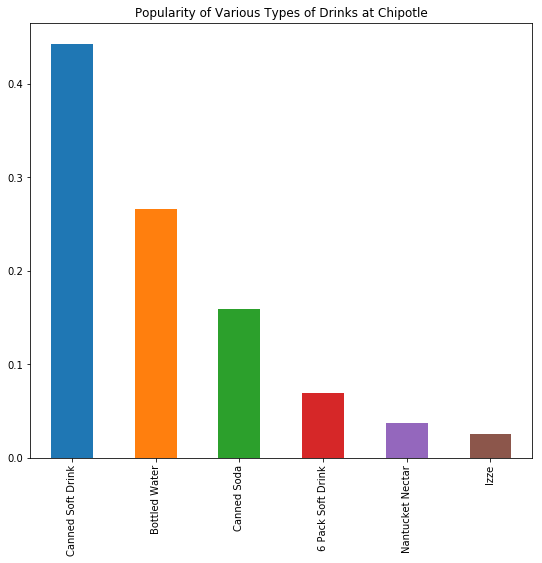

In [36]:
#now we can start to visualize the popularity of various types of drinks
drinks_expander().value_counts(normalize=True).plot(kind="bar", figsize=(9,8))
plt.title("Popularity of Various Types of Drinks at Chipotle")
plt.show()

#it makes sense that Izze/Nantucket Nectar would be the less popular than regular soft drinks, 
#as they are 3 times more expensive than a regular soft drink but offer roughly the same value to the consumer

# How much revenue does chipotle make selling these various types of drinks?

In [37]:
chipotle_drinks.groupby("item_name")["item_price"].sum()

item_name
6 Pack Soft Drink    356.95
Bottled Water        302.56
Canned Soda          137.34
Canned Soft Drink    438.75
Izze                  67.80
Nantucket Nectar      98.31
Name: item_price, dtype: float64

In [38]:
print("The total revenue across all drink orders is", "$"+str(sum(chipotle_drinks["item_price"])))

The total revenue across all drink orders is $1401.71


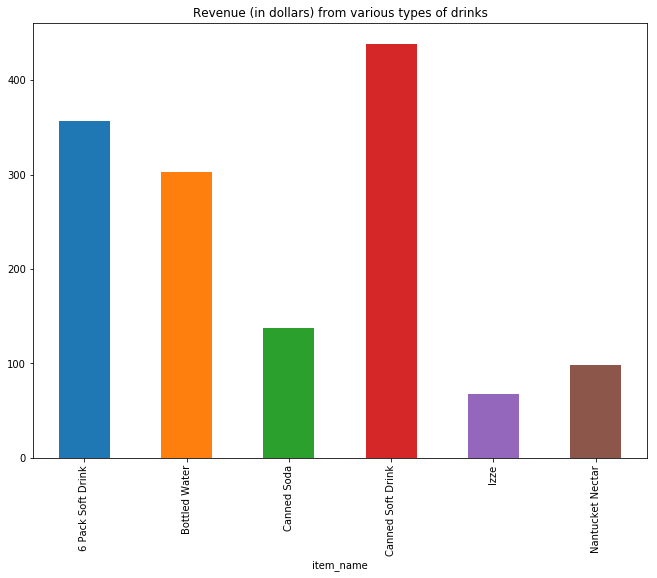

In [39]:
chipotle_drinks.groupby("item_name")["item_price"].sum().plot(kind="bar",figsize=(11,8))
plt.title("Revenue (in dollars) from various types of drinks")
plt.show()

### Let's now look at the subdistribution of canned sodas and soft drinks purchases

In [40]:
#Code to write over clean_choice_description -- change "Coke" to "Coca Cola"
clean_choice_description = []
for item in chipotle_drinks["clean_choice_description"]:
    if item == "Coke":
        clean_choice_description.append("Coca Cola")
    else:
        clean_choice_description.append(item)

In [41]:
chipotle_drinks["clean_choice_description_final"] = clean_choice_description

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
#chipotle_drinks.drop("clean_choice_description",axis = 1, inplace = True)

In [43]:
set(chipotle_drinks[(chipotle_drinks.item_name == "Canned Soda") | (chipotle_drinks.item_name == "Canned Soft Drink") | (chipotle_drinks.item_name == "6 Pack Soft Drink")]["clean_choice_description_final"])
#set containing all soft drinks on offer at chipotle 

{'Coca Cola',
 'Diet Coke',
 'Diet Dr. Pepper',
 'Dr. Pepper',
 'Lemonade',
 'Mountain Dew',
 'Nestea',
 'Sprite'}

In [44]:
drinks_cannedSodas_indices = chipotle_drinks[(chipotle_drinks.item_name == "Canned Soda") | (chipotle_drinks.item_name == "Canned Soft Drink")].index.values.tolist()
#grab the index values so we can cross-reference                                                                                                               

In [45]:
chipotle_drinks[(chipotle_drinks.item_name == "Canned Soda") | (chipotle_drinks.item_name == "Canned Soft Drink")].clean_choice_description_final.head(10)

18              Sprite
28          Dr. Pepper
51        Mountain Dew
53              Sprite
107         Dr. Pepper
117    Diet Dr. Pepper
126          Coca Cola
162          Diet Coke
171    Diet Dr. Pepper
179          Coca Cola
Name: clean_choice_description_final, dtype: object

In [46]:
chipotle_drinks[(chipotle_drinks.item_name == "Canned Soda") | (chipotle_drinks.item_name == "Canned Soft Drink")].quantity.head(10)

18     2
28     1
51     2
53     1
107    1
117    1
126    1
162    2
171    2
179    1
Name: quantity, dtype: int64

In [47]:
def cannedSodas_expander(category="clean_choice_description_final"):
    expanded_drinks = []
    
    for i in drinks_cannedSodas_indices:
        if chipotle_drinks["quantity"][i] == 1:
            expanded_drinks.append(chipotle_drinks[category][i])
        else:
            for n in [None]*chipotle_drinks["quantity"][i]:
                expanded_drinks.append(chipotle_drinks[category][i])
                
    return pd.Series(expanded_drinks)

cannedSodas_expander().head(10)

0             Sprite
1             Sprite
2         Dr. Pepper
3       Mountain Dew
4       Mountain Dew
5             Sprite
6         Dr. Pepper
7    Diet Dr. Pepper
8          Coca Cola
9          Diet Coke
dtype: object

### Coca Cola is the most popular soft drink at Chipotle, followed by Diet Coke

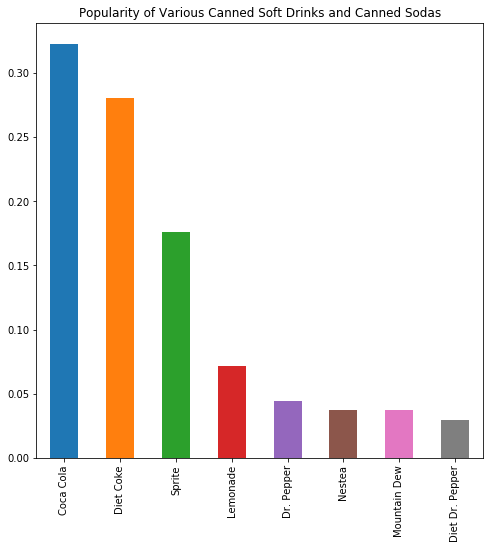

In [48]:
cannedSodas_expander().value_counts(normalize=True).plot(kind="bar", figsize = (8,8))
plt.title("Popularity of Various Canned Soft Drinks and Canned Sodas")
plt.show()

# Let's now examine the `chipotle_food` dataset

In [49]:
set(chipotle_food["item_name"])

{'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bowl',
 'Burrito',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Tacos',
 'Veggie Bowl',
 'Veggie Burrito',
 'Veggie Crispy Tacos',
 'Veggie Salad',
 'Veggie Salad Bowl',
 'Ve

## Lets first analyze the popularity of various `fillings_types`

### Fillings are of the following categories:

In [50]:
def filling_finder(row):
    if "Barbacoa" in row["item_name"]:
        return "Barbacoa"
    elif "Carnitas" in row["item_name"]:
        return "Carnitas"
    elif "Chicken" in row["item_name"]:
        return "Chicken"
    elif "Steak" in row["item_name"]:
        return "Steak"
    elif "Veggie" in row["item_name"]:
        return "Veggie"

chipotle_food["filling_type"] = chipotle_food.apply(filling_finder, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [51]:
chipotle_food.head(10)

,order_id,quantity,item_name,choice_description,item_price,drink_order,filling_type
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39,False,None
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,False,None
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,False,Chicken
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,False,Chicken
6,3,1,Side of Chips,NULL,1.69,False,None
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,False,Steak
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,False,Steak
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,False,Steak
10,5,1,Chips and Guacamole,NULL,4.45,False,None
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,False,Chicken


In [52]:
def filling_expander(category="filling_type"):
    expanded_filling = []
    
    for i in [i for i in chipotle_food.index.values.tolist() if chipotle_food["filling_type"][i] != None]:
        if chipotle_food["quantity"][i] == 1:
            expanded_filling.append(chipotle_food[category][i])
        else:
            for n in [None]*chipotle_food["quantity"][i]:
                expanded_filling.append(chipotle_food[category][i])
                
    return pd.Series(expanded_filling)

filling_expander().head(10)

0    Chicken
1    Chicken
2    Chicken
3      Steak
4      Steak
5      Steak
6    Chicken
7    Chicken
8    Chicken
9    Chicken
dtype: object

In [53]:
filling_expander().value_counts()

Chicken     1654
Steak        734
Veggie       217
Barbacoa     204
Carnitas     186
dtype: int64

In [54]:
print("Only",format((217/filling_expander().value_counts().sum())*100, ".2f")+"%","of fillings ordered are vegetarian options.")

Only 7.25% of fillings ordered are vegetarian options.


### Chicken is the most popular filling across all orders, followed by steak...

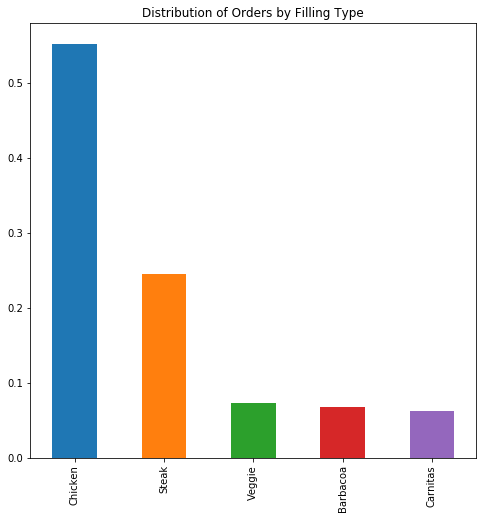

In [55]:
filling_expander().value_counts(normalize=True).plot(kind="bar", figsize = (8,8))
plt.title("Distribution of Orders by Filling Type")
plt.show()

# Lets next analyze the popularity of various `meal_types`

### Meals are of the following categories:

In [56]:
def meal_type(row):
    if "Salad Bowl" in row["item_name"]:
        return "Salad Bowl"
    elif "Salad" in row["item_name"] and "Bowl" not in row["item_name"]:
        return "Salad"
    elif "Bowl" in row["item_name"] and "Salad" not in row["item_name"]:
        return "Bowl"
    elif "Burrito" in row["item_name"]:
        return "Burrito"
    elif "Tacos" in row["item_name"]:
        return "Tacos"
    elif "Chips" in row["item_name"]:
        return "Chips"
    
chipotle_food["meal_type"] = chipotle_food.apply(meal_type, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [57]:
chipotle_food.head()

,order_id,quantity,item_name,choice_description,item_price,drink_order,filling_type,meal_type
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39,False,None,Chips
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,False,None,Chips
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,False,Chicken,Bowl
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,False,Chicken,Bowl
6,3,1,Side of Chips,NULL,1.69,False,None,Chips


In [58]:
def meal_expander(category ="meal_type"):
    expanded_meal = []
    
    for i in chipotle_food.index.values.tolist():
        if chipotle_food["quantity"][i] == 1:
            expanded_meal.append(chipotle_food[category][i])
        else:
            for n in [None]*chipotle_food["quantity"][i]:
                expanded_meal.append(chipotle_food[category][i])
    return pd.Series(expanded_meal)

meal_expander().head(10)

0      Chips
1      Chips
2       Bowl
3       Bowl
4       Bowl
5      Chips
6    Burrito
7      Tacos
8    Burrito
9      Chips
dtype: object

In [59]:
meal_expander().value_counts(normalize=True) #note the use of normalized value counts

Burrito       0.294498
Bowl          0.289474
Chips         0.280144
Tacos         0.085646
Salad Bowl    0.044976
Salad         0.005263
dtype: float64

## > Nearly 60% of the chipotle food orders are either `Burritos` or `Bowls`.

## > `Tacos` , `Salad Bowls` and `Salads` collectively comprise only 12.5% of the orders.

### > `Salads` specifically comprise only .5% of sales and are the least popular meal type.

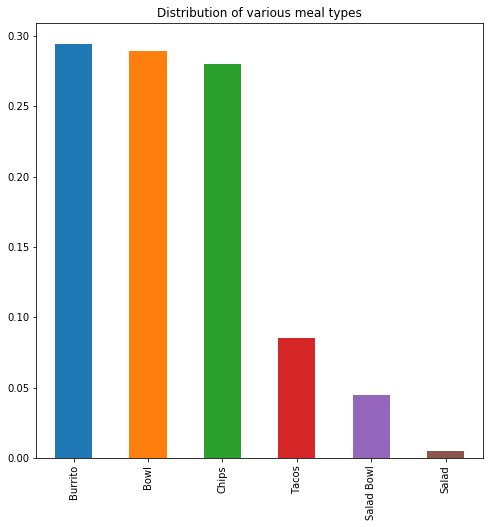

In [60]:
meal_expander().value_counts(normalize=True).plot(kind = "bar", figsize = (8,8))
plt.title("Distribution of various meal types")
plt.show()

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [61]:
def burrito_finder(row):
    if "Burrito" in row["item_name"]:
        return True
    else:
        return False

chipotle_food["burrito"] = chipotle_food.apply(burrito_finder, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [62]:
chipotle_food_burritos = chipotle_food[chipotle_food.burrito == True]

def get_choice_description_set(index):
    counter_type_isList = 0    
    for item in chipotle_food_burritos["choice_description"][index]:
        if type(item) == list:
            counter_type_isList += 1
        
    if counter_type_isList == 0:
        return set([items for items in chipotle_food_burritos["choice_description"][index]])
    elif counter_type_isList == 1:
        return set([chipotle_food_burritos["choice_description"][index][0]]+
            [items for items in chipotle_food_burritos["choice_description"][index][1]])

In [63]:
#set.union(*[get_choice_description_set(i) for i in chipotle_food_burritos.index.values.tolist()]) 

In [64]:
chipotle_toppings = set(["Guacamole",
                        "Fresh Tomato Salsa",
                        'Fresh Tomato (Mild)',
                        'Fresh Tomato Salsa (Mild)',
                        'Roasted Chili Corn (Medium)',
                        'Roasted Chili Corn Salsa (Medium)',
                        "Roasted Chili Corn Salsa",
                        'Tomatillo-Green Chili Salsa (Medium)',
                        'Tomatillo Green Chili (Medium)',
                        'Tomatillo Green Chili Salsa',
                        'Tomatillo Red Chili (Hot)',
                        'Tomatillo Red Chili Salsa',
                        'Tomatillo-Red Chili Salsa (Hot)',
                        "Sour Cream",
                        "Salsa",
                        "Fajita Veggies",
                        'Fajita Vegetables',
                        'Fajita Veggie',
                        "Cheese",
                        "Lettuce"])

# toppings list from https://order.chipotle.com/entree/burrito

In [65]:
print("The average number of toppings per burrito is", format(pd.Series([len(set_i & chipotle_toppings) for set_i in 
                                                              [get_choice_description_set(i) for i in 
                                                               chipotle_food_burritos.index.values.tolist()] ]).mean(),".2f"))

The average number of toppings per burrito is 3.77


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [66]:
def chip_finder(row):
    if "Chips" in row["item_name"]:
        return True
    else:
        return False    
chipotle_food["chip_order"] = chipotle_food.apply(chip_finder, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
chipotle_food_chips = chipotle_food[chipotle_food.chip_order == True]

In [68]:
chipotle_food_chips.head(10)

,order_id,quantity,item_name,choice_description,item_price,drink_order,filling_type,meal_type,burrito,chip_order
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39,False,None,Chips,False,True
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,False,None,Chips,False,True
6,3,1,Side of Chips,NULL,1.69,False,None,Chips,False,True
10,5,1,Chips and Guacamole,NULL,4.45,False,None,Chips,False,True
14,7,1,Chips and Guacamole,NULL,4.45,False,None,Chips,False,True
15,8,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,False,None,Chips,False,True
20,10,1,Chips and Guacamole,NULL,4.45,False,None,Chips,False,True
25,13,1,Chips and Fresh Tomato Salsa,NULL,2.39,False,None,Chips,False,True
30,15,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,False,None,Chips,False,True
32,16,1,Side of Chips,NULL,1.69,False,None,Chips,False,True


In [69]:
chips_dict = {}

for i in chipotle_food_chips.index.values.tolist():
    if chipotle_food_chips["item_name"][i] not in chips_dict.keys() and chipotle_food_chips["quantity"][i] == 1:
        chips_dict[chipotle_food_chips["item_name"][i]] = 1
    else:
        chips_dict[chipotle_food_chips["item_name"][i]] += chipotle_food_chips["quantity"][i]

chips_dict['Chips and Tomatillo Green Chili Salsa'] += chips_dict['Chips and Tomatillo-Green Chili Salsa']
del chips_dict['Chips and Tomatillo-Green Chili Salsa']

chips_dict['Chips and Tomatillo Red Chili Salsa'] += chips_dict['Chips and Tomatillo-Red Chili Salsa']
del chips_dict['Chips and Tomatillo-Red Chili Salsa']

chips_dict['Chips and Roasted Chili Corn Salsa'] += chips_dict['Chips and Roasted Chili-Corn Salsa']
del chips_dict['Chips and Roasted Chili-Corn Salsa']

In [70]:
chips_dict

{'Chips and Fresh Tomato Salsa': 130,
 'Side of Chips': 110,
 'Chips and Guacamole': 506,
 'Chips and Tomatillo Green Chili Salsa': 78,
 'Chips': 230,
 'Chips and Tomatillo Red Chili Salsa': 75,
 'Chips and Roasted Chili Corn Salsa': 41,
 'Chips and Mild Fresh Tomato Salsa': 1}

## Chips and guacamole are by far the most popular chip order

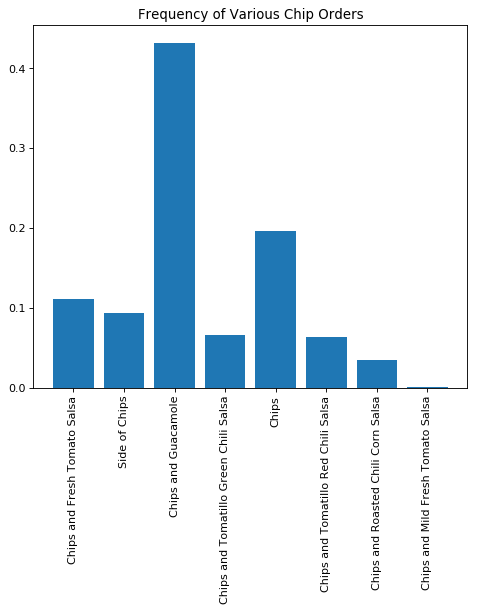

In [71]:
import numpy as np

plt.figure(num=None, figsize=(7,6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(chips_dict.keys())), np.divide(list(chips_dict.values()), sum(chips_dict.values())))
plt.xticks(range(len(chips_dict.values())), chips_dict.keys(), rotation=90)
plt.title("Frequency of Various Chip Orders")
plt.show()

# Thank you! 